Training and tuning multilayer perceptrons in scikit-learn

MLPClassifier() and MLPRegressor() contain several parameters for refining the training process, which are described in the following table. For a trained neural network, mlp, the attribute mlp.loss_curve_ contains the loss function's value after each epoch.

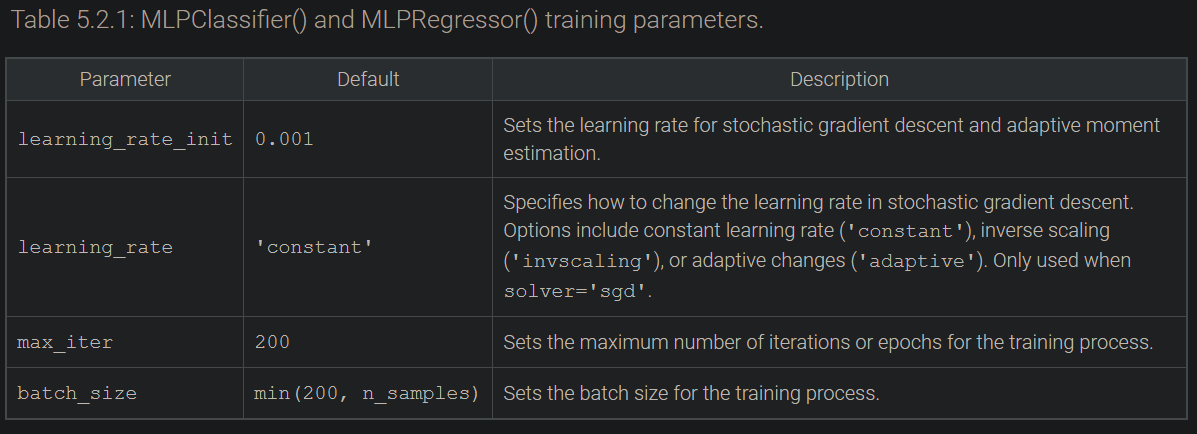

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.neural_network import MLPClassifier

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
print('Training size', len(train))
print('Testing size', len(test))

Training size 6000
Testing size 1000


In [4]:
Xtrain = train
Xtrain = Xtrain.drop(['label'], axis=1)
ytrain = train['label']

In [5]:
# Set training hyperparameters
mlpModel = MLPClassifier(random_state=123, learning_rate='constant',
                         learning_rate_init=0.001, max_iter=500)
mlpModel.fit(Xtrain, ytrain)

MLPClassifier(max_iter=500, random_state=123)

Text(0, 0.5, 'Loss')

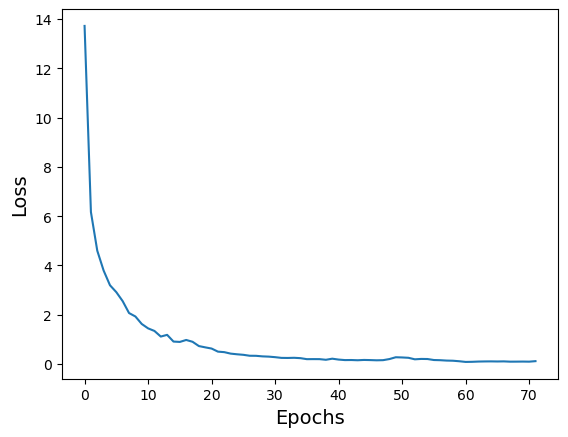

In [6]:
# Plot loss function
plt.plot(mlpModel.loss_curve_)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

In [7]:
# Change initial learning rate
mlpModel0 = MLPClassifier(random_state=123, learning_rate_init=0.0001, max_iter=100)
mlpModel0.fit(Xtrain, ytrain)

mlpModel1 = MLPClassifier(random_state=123, learning_rate_init=0.001, max_iter=100)
mlpModel1.fit(Xtrain, ytrain)

mlpModel2 = MLPClassifier(random_state=123, learning_rate_init=0.01, max_iter=100)
mlpModel2.fit(Xtrain, ytrain)

mlpModel3 = MLPClassifier(random_state=123, learning_rate_init=0.1, max_iter=100)
mlpModel3.fit(Xtrain, ytrain)

/nix/store/msas3yllgpa9cv1srn6gxry7ygra9hwm-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(learning_rate_init=0.1, max_iter=100, random_state=123)

Text(0, 0.5, 'Loss')

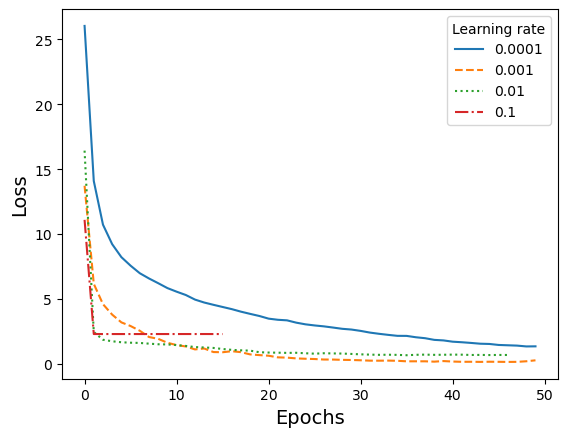

In [8]:
# Plot loss functions to compare learning rate
plt.plot(mlpModel0.loss_curve_[0:50], label='0.0001', linestyle='solid')
plt.plot(mlpModel1.loss_curve_[0:50], label='0.001', linestyle='dashed')
plt.plot(mlpModel2.loss_curve_[0:50], label='0.01', linestyle='dotted')
plt.plot(mlpModel3.loss_curve_[0:50], label='0.1', linestyle='dashdot')
plt.legend(title='Learning rate')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)